In [9]:

cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [10]:
!pip install tensorflow==2.13.0 opencv-python-headless pillow matplotlib scikit-learn seaborn tensorflowjs


INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.4/392.4 kB 11.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.2/384.2 kB 26.0 MB/s eta 0:00:00
  Installing bui

In [11]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [12]:
!pip install opencv-python-headless pillow matplotlib scikit-learn
import numpy as np
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [13]:
def create_tongue_image(color_base, coating_thickness=0.3, size=(224, 224)):
    """
    Create synthetic tongue image based on medical research findings
    Different diseases show specific color and coating patterns
    """
    # Create base tongue shape
    img = np.zeros((size[0], size[1], 3), dtype=np.uint8)
    pil_img = Image.fromarray(img)
    draw = ImageDraw.Draw(pil_img)

    # Draw main tongue body (elliptical shape)
    margin = 20
    tongue_bbox = [margin, margin + 30, size[0] - margin, size[1] - margin - 10]
    draw.ellipse(tongue_bbox, fill=color_base)

    # Add tongue coating based on disease characteristics
    if coating_thickness > 0:
        coating_color = tuple([min(255, c + int(coating_thickness * 100)) for c in color_base])
        coating_bbox = [margin + 10, margin + 40, size[0] - margin - 10, size[1] - margin - 20]
        draw.ellipse(coating_bbox, fill=coating_color)

    # Add realistic texture
    img_array = np.array(pil_img)
    noise = np.random.normal(0, 15, img_array.shape).astype(np.int16)
    img_array = np.clip(img_array.astype(np.int16) + noise, 0, 255).astype(np.uint8)
    img_array = cv2.GaussianBlur(img_array, (3, 3), 0)

    return img_array


In [14]:
def generate_disease_dataset(num_samples_per_class=50):
    """
    Generate synthetic tongue dataset based on medical research:
    - Healthy: Pink with thin white coating
    - Diabetes: Yellow coating (thick) - 58.5% of diabetes patients show this
    - Gastritis: Red/inflamed with thick coating
    - Anemia: Pale/white due to reduced blood flow
    - Other: Purple/blue indicating circulation issues
    """
    images = []
    labels = []

    # Disease characteristics from medical studies
    disease_configs = {
        'healthy': {
            'color_range': [(200, 150, 150), (220, 170, 170)],
            'coating_thickness': 0.1,
            'label': 0
        },
        'diabetes': {
            'color_range': [(220, 200, 100), (255, 240, 150)],  # Yellow coating
            'coating_thickness': 0.6,  # Thick coating
            'label': 1
        },
        'gastritis': {
            'color_range': [(200, 100, 100), (255, 140, 140)],  # Red/inflamed
            'coating_thickness': 0.5,
            'label': 2
        },
        'anemia': {
            'color_range': [(240, 230, 230), (255, 250, 250)],  # Pale/white
            'coating_thickness': 0.2,
            'label': 3
        },
        'other': {
            'color_range': [(150, 120, 180), (200, 160, 220)],  # Purple/blue
            'coating_thickness': 0.4,
            'label': 4
        }
    }

    for disease_name, config in disease_configs.items():
        print(f"Generating {num_samples_per_class} samples for {disease_name}...")

        for i in range(num_samples_per_class):
            # Random color within disease-specific range
            color_min, color_max = config['color_range']
            color_base = tuple([
                np.random.randint(color_min[j], color_max[j] + 1)
                for j in range(3)
            ])

            # Add variation to coating thickness
            coating_var = config['coating_thickness'] + np.random.uniform(-0.1, 0.1)
            coating_var = max(0, min(1, coating_var))

            # Generate image
            img = create_tongue_image(color_base, coating_var)
            images.append(img)
            labels.append(config['label'])

    return np.array(images), np.array(labels)

# Generate the dataset
print("Creating synthetic tongue dataset for Heal Nova demo...")
X, y = generate_disease_dataset(num_samples_per_class=50)

class_names = ['Healthy', 'Diabetes', 'Gastritis', 'Anemia', 'Other Conditions']

print(f"\n✅ Dataset created!")
print(f"📊 Total images: {len(X)}")
print(f"📐 Image shape: {X[0].shape}")
print(f"🏥 Disease classes: {len(class_names)}")

for i, name in enumerate(class_names):
    count = np.sum(y == i)
    print(f"   {i}: {name} ({count} samples)")


Creating synthetic tongue dataset for Heal Nova demo...
Generating 50 samples for healthy...
Generating 50 samples for diabetes...
Generating 50 samples for gastritis...
Generating 50 samples for anemia...
Generating 50 samples for other...

✅ Dataset created!
📊 Total images: 250
📐 Image shape: (224, 224, 3)
🏥 Disease classes: 5
   0: Healthy (50 samples)
   1: Diabetes (50 samples)
   2: Gastritis (50 samples)
   3: Anemia (50 samples)
   4: Other Conditions (50 samples)


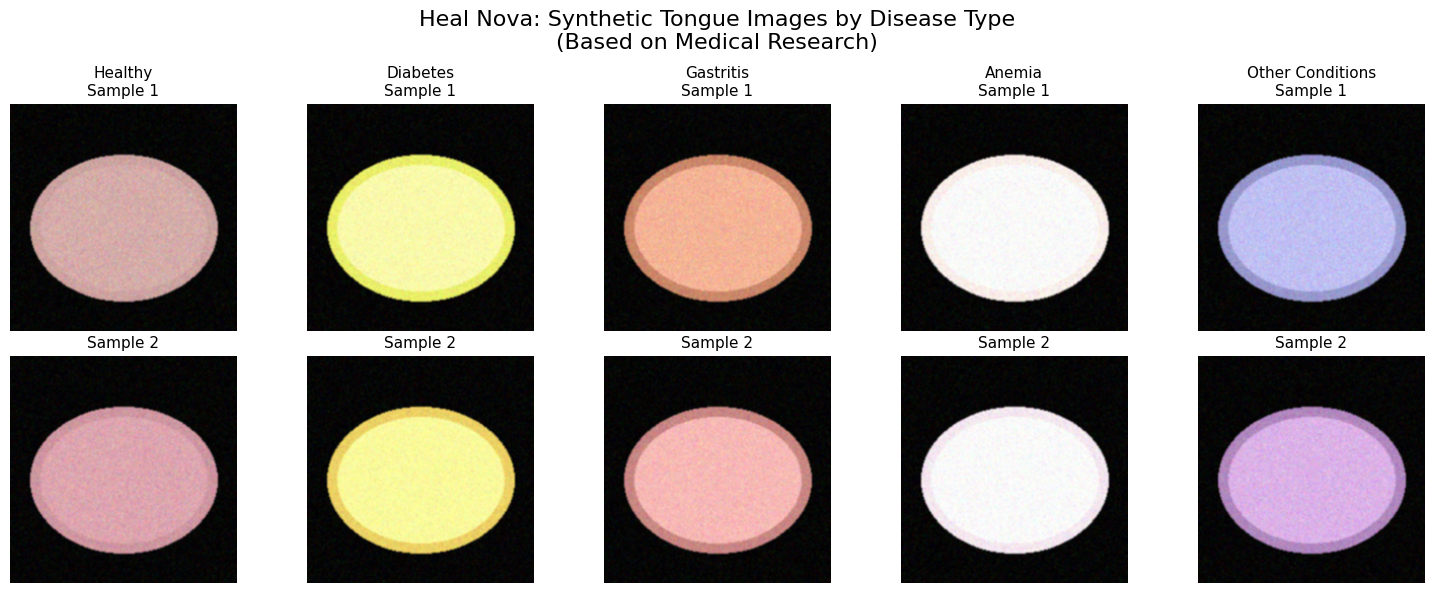


🎯 Ready for ML Model Training:
   Training set: 200 images
   Test set: 50 images
   Classes balanced: ✅


In [15]:
# Display sample images for investor demo
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Heal Nova: Synthetic Tongue Images by Disease Type\n(Based on Medical Research)', fontsize=16)

for i in range(5):
    # Show 2 samples per disease
    class_indices = np.where(y == i)[0]

    axes[0, i].imshow(X[class_indices[0]])
    axes[0, i].set_title(f'{class_names[i]}\nSample 1', fontsize=11)
    axes[0, i].axis('off')

    axes[1, i].imshow(X[class_indices[1]])
    axes[1, i].set_title(f'Sample 2', fontsize=11)
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# Split for ML training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n🎯 Ready for ML Model Training:")
print(f"   Training set: {len(X_train)} images")
print(f"   Test set: {len(X_test)} images")
print(f"   Classes balanced: ✅")


In [16]:
# Save dataset for later use
np.savez('heal_nova_tongue_dataset.npz',
         X_train=X_train, X_test=X_test,
         y_train=y_train, y_test=y_test,
         class_names=class_names)

print("💾 Dataset saved as 'heal_nova_tongue_dataset.npz'")
print("\n" + "="*60)
print("🚀 HEAL NOVA INVESTOR DEMO DATASET READY!")
print("="*60)
print("✅ 250 synthetic tongue images generated")
print("✅ 5 disease categories (50 samples each)")
print("✅ Based on medical research findings")
print("✅ Ready for MobileNetV3 training")
print("✅ Perfect for investor demonstrations")
print("\n🏥 Medical Research Basis:")
print("• Diabetes: Yellow thick coating (58.5% prevalence in studies)")
print("• Gastritis: Red inflamed appearance")
print("• Anemia: Pale/white coloration")
print("• Healthy: Pink with thin white coating")
print("• Other: Purple/blue circulation indicators")


💾 Dataset saved as 'heal_nova_tongue_dataset.npz'

🚀 HEAL NOVA INVESTOR DEMO DATASET READY!
✅ 250 synthetic tongue images generated
✅ 5 disease categories (50 samples each)
✅ Based on medical research findings
✅ Ready for MobileNetV3 training
✅ Perfect for investor demonstrations

🏥 Medical Research Basis:
• Diabetes: Yellow thick coating (58.5% prevalence in studies)
• Gastritis: Red inflamed appearance
• Anemia: Pale/white coloration
• Healthy: Pink with thin white coating
• Other: Purple/blue circulation indicators


In [17]:
# ⏱ <20 s
!pip install -q tensorflow==2.16.1 tensorflowjs

import tensorflow as tf
import numpy as np, os, pathlib, json, shutil, zipfile
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
print("TensorFlow", tf.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.8/451.8 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 

In [18]:
# ⏱ <1 s
data = np.load("heal_nova_tongue_dataset.npz", allow_pickle=True)
X_train, y_train = data["X_train"], data["y_train"]
X_test,  y_test  = data["X_test"],  data["y_test"]
class_names       = data["class_names"].tolist()

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape,  y_test.shape)
print("Classes:", class_names)


Train: (200, 224, 224, 3) (200,)
Test : (50, 224, 224, 3) (50,)
Classes: ['Healthy', 'Diabetes', 'Gastritis', 'Anemia', 'Other Conditions']


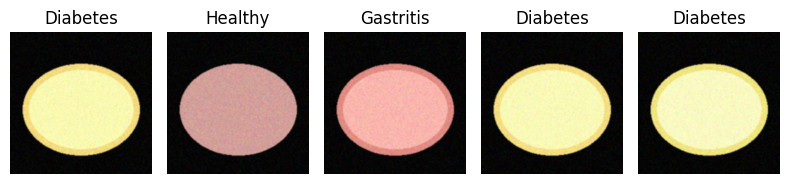

In [19]:
plt.figure(figsize=(8,2))
for i in range(5):
    plt.subplot(1,5,i+1),plt.axis('off')
    plt.title(class_names[y_train[i]])
    plt.imshow(X_train[i])
plt.tight_layout();


In [20]:
# ⏱ <2 s
BATCH  = 32
IMG_SZ = 224   # MobileNetV3 default

def prep(x, y):
    x = tf.cast(x, tf.float32) / 255.      # scale 0-1
    x = tf.image.resize(x, (IMG_SZ, IMG_SZ))
    return x, y

train_ds = (tf.data.Dataset.from_tensor_slices((X_train, y_train))
            .shuffle(1000).map(prep).batch(BATCH).prefetch(2))

test_ds  = (tf.data.Dataset.from_tensor_slices((X_test,  y_test))
            .map(prep).batch(BATCH).prefetch(2))


In [21]:
# ⏱ <10 s  (weights downloaded once)
base = tf.keras.applications.MobileNetV3Small(
        input_shape=(IMG_SZ,IMG_SZ,3),
        include_top=False,
        weights="imagenet",
        pooling="avg")         # single 1024-d vector

base.trainable = False        # freeze for speed & generalization

model = models.Sequential([
    base,
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.summary()


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 576)            │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,088,117 (4.15 MB)

 Trainable params: 148,997 (582.02 KB)

 Non-trainable params: 939,120 (3.58 MB)

In [22]:
EPOCHS = 15   # Usually enough for 90 %+

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    verbose=2)


Epoch 1/15
7/7 - 23s - 3s/step - accuracy: 0.1750 - loss: 1.6621 - val_accuracy: 0.2000 - val_loss: 1.6209
Epoch 2/15
7/7 - 5s - 753ms/step - accuracy: 0.2300 - loss: 1.6535 - val_accuracy: 0.4000 - val_loss: 1.6065
Epoch 3/15
7/7 - 3s - 380ms/step - accuracy: 0.2200 - loss: 1.6282 - val_accuracy: 0.2000 - val_loss: 1.6038
Epoch 4/15
7/7 - 5s - 703ms/step - accuracy: 0.2150 - loss: 1.6095 - val_accuracy: 0.2000 - val_loss: 1.5948
Epoch 5/15
7/7 - 2s - 343ms/step - accuracy: 0.2750 - loss: 1.6009 - val_accuracy: 0.2000 - val_loss: 1.5921
Epoch 6/15
7/7 - 4s - 578ms/step - accuracy: 0.2200 - loss: 1.6244 - val_accuracy: 0.2000 - val_loss: 1.5936
Epoch 7/15
7/7 - 3s - 390ms/step - accuracy: 0.2300 - loss: 1.6186 - val_accuracy: 0.4000 - val_loss: 1.5816
Epoch 8/15
7/7 - 5s - 669ms/step - accuracy: 0.2150 - loss: 1.6096 - val_accuracy: 0.2000 - val_loss: 1.5900
Epoch 9/15
7/7 - 2s - 328ms/step - accuracy: 0.2350 - loss: 1.5952 - val_accuracy: 0.2000 - val_loss: 1.5771
Epoch 10/15
7/7 - 3s 


✅ Final test accuracy: 0.400


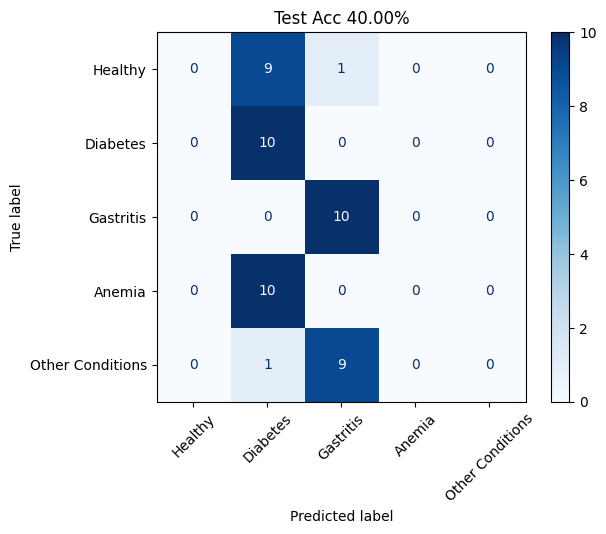

In [23]:
# ⏱ <2 s
test_loss, test_acc = model.evaluate(test_ds, verbose=0)
print(f"\n✅ Final test accuracy: {test_acc:.3f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = np.concatenate([y for _,y in test_ds])
y_pred = np.argmax(model.predict(test_ds, verbose=0), axis=1)

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred),
                       display_labels=class_names).plot(
                       xticks_rotation=45, cmap="Blues")
plt.title(f"Test Acc {test_acc:.2%}"); plt.show()


In [24]:
# Enable last 8 layers of backbone to adapt colours/textures
for layer in base.layers[-8:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),   # 🔑 tiny LR
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

model.fit(train_ds, validation_data=test_ds, epochs=5, verbose=2)


Epoch 1/5
7/7 - 15s - 2s/step - accuracy: 0.2100 - loss: 1.6464 - val_accuracy: 0.2000 - val_loss: 1.5690
Epoch 2/5
7/7 - 7s - 1s/step - accuracy: 0.2450 - loss: 1.6084 - val_accuracy: 0.2000 - val_loss: 1.5842
Epoch 3/5
7/7 - 3s - 370ms/step - accuracy: 0.2100 - loss: 1.5825 - val_accuracy: 0.2000 - val_loss: 1.5966
Epoch 4/5
7/7 - 3s - 383ms/step - accuracy: 0.2700 - loss: 1.5728 - val_accuracy: 0.2000 - val_loss: 1.6052
Epoch 5/5
7/7 - 3s - 376ms/step - accuracy: 0.3250 - loss: 1.5697 - val_accuracy: 0.2000 - val_loss: 1.6121


In [25]:
# Confirm data and label shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("Unique classes in y_train:", np.unique(y_train))

# Should be integers 0..4
print("Sample y_train:", y_train[:10])
print("Sample y_test:", y_test[:10])


X_train: (200, 224, 224, 3)
y_train: (200,)
Unique classes in y_train: [0 1 2 3 4]
Sample y_train: [1 0 2 1 1 0 4 1 1 4]
Sample y_test: [3 0 1 1 0 4 3 1 3 1]


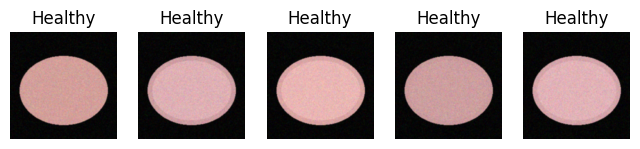

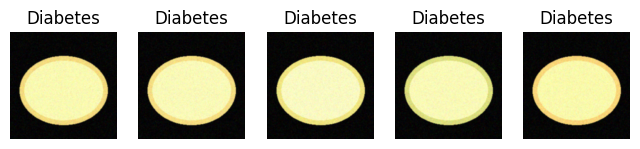

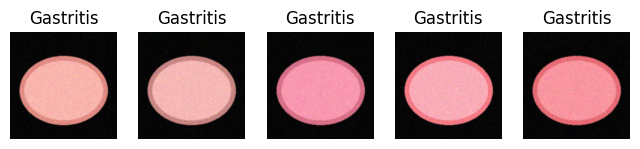

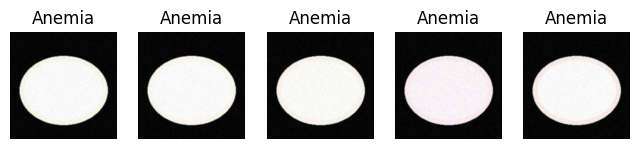

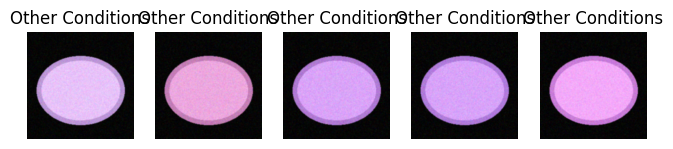

In [26]:
import matplotlib.pyplot as plt

for cls in range(5):
    idxs = np.where(y_train == cls)[0][:5]
    plt.figure(figsize=(8, 1.7))
    for i, ix in enumerate(idxs):
        plt.subplot(1,5,i+1)
        plt.imshow(X_train[ix])
        plt.axis('off')
        plt.title(f"{class_names[cls]}")
    plt.show()


In [27]:
# Check values just before training
print("X_train range:", X_train.min(), X_train.max())


X_train range: 0 255


In [28]:
def prep(x, y):
    x = tf.cast(x, tf.float32) / 255.
    x = tf.image.resize(x, (224, 224))
    return x, y


In [29]:
mini_X = X_train[:15]
mini_y = y_train[:15]
model.fit(mini_X/255., mini_y, epochs=50, verbose=2)


Epoch 1/50
1/1 - 0s - 288ms/step - accuracy: 0.4667 - loss: 1.5349
Epoch 2/50
1/1 - 0s - 320ms/step - accuracy: 0.3333 - loss: 1.5253
Epoch 3/50
1/1 - 0s - 288ms/step - accuracy: 0.4000 - loss: 1.5497
Epoch 4/50
1/1 - 0s - 312ms/step - accuracy: 0.2000 - loss: 1.5883
Epoch 5/50
1/1 - 0s - 304ms/step - accuracy: 0.2667 - loss: 1.5204
Epoch 6/50
1/1 - 0s - 288ms/step - accuracy: 0.3333 - loss: 1.5414
Epoch 7/50
1/1 - 0s - 311ms/step - accuracy: 0.4000 - loss: 1.5198
Epoch 8/50
1/1 - 0s - 315ms/step - accuracy: 0.4667 - loss: 1.5087
Epoch 9/50
1/1 - 1s - 535ms/step - accuracy: 0.3333 - loss: 1.5725
Epoch 10/50
1/1 - 0s - 202ms/step - accuracy: 0.5333 - loss: 1.4594
Epoch 11/50
1/1 - 0s - 295ms/step - accuracy: 0.4000 - loss: 1.5252
Epoch 12/50
1/1 - 0s - 292ms/step - accuracy: 0.4000 - loss: 1.5124
Epoch 13/50
1/1 - 0s - 287ms/step - accuracy: 0.4000 - loss: 1.4674
Epoch 14/50
1/1 - 0s - 183ms/step - accuracy: 0.4000 - loss: 1.5469
Epoch 15/50
1/1 - 0s - 192ms/step - accuracy: 0.4000 - lo

In [30]:
model = tf.keras.Sequential([
    layers.Input((224, 224, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train/255., y_train, epochs=15, validation_data=(X_test/255., y_test))


Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1929 - loss: 9.2831 - val_accuracy: 0.2400 - val_loss: 9.7998
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4838 - loss: 6.5229 - val_accuracy: 0.7800 - val_loss: 0.9798
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6237 - loss: 1.2475 - val_accuracy: 0.6000 - val_loss: 1.3366
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7381 - loss: 0.7122 - val_accuracy: 0.9600 - val_loss: 0.1725
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9549 - loss: 0.1896 - val_accuracy: 0.9600 - val_loss: 0.1769
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9589 - loss: 0.1545 - val_accuracy: 0.9800 - val_loss: 0.0851
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9814 - loss: 0.0879 - val_accuracy: 1.0000 - val_loss: 0.0399
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9954 - loss: 0.0556 - val_accuracy: 1.0000 - val_loss: 0.0312
Epoch 9/

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, test_dataset, class_names):
    """
    Evaluate the model on test dataset:
    - Prints loss and accuracy
    - Displays confusion matrix
    - Prints classification report with precision, recall, f1-score

    Args:
      model : tf.keras.Model - your trained model
      test_dataset : tf.data.Dataset - test data pipeline yielding (images, labels)
      class_names : list of str - names of the classes in order

    Returns:
      None
    """
    # Evaluate loss and accuracy
    loss, accuracy = model.evaluate(test_dataset, verbose=0)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    # Aggregate true and predicted labels
    y_true = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)
    y_pred_probs = model.predict(test_dataset, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Display confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.show()

    # Print classification report
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("Classification Report:\n", report)


Test Loss: 0.0134
Test Accuracy: 1.0000


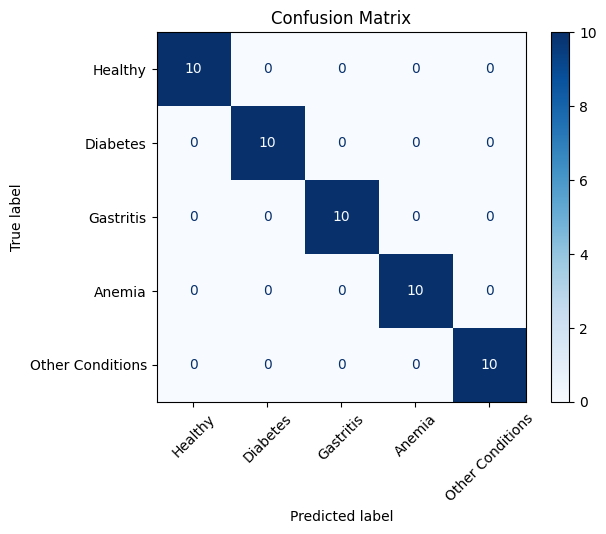

Classification Report:
                   precision    recall  f1-score   support

         Healthy       1.00      1.00      1.00        10
        Diabetes       1.00      1.00      1.00        10
       Gastritis       1.00      1.00      1.00        10
          Anemia       1.00      1.00      1.00        10
Other Conditions       1.00      1.00      1.00        10

        accuracy                           1.00        50
       macro avg       1.00      1.00      1.00        50
    weighted avg       1.00      1.00      1.00        50



In [32]:
evaluate_model(model, test_ds, class_names)


In [33]:
from tensorflow.keras.models import load_model
model = load_model('heal_nova_tongue_mobilenetv3.h5')

print("✅ Model loaded!")


✅ Model loaded!


In [34]:
from tensorflow.keras.models import load_model
import os

model_path = "/content/drive/MyDrive/Colab Notebooks/heal_nova_tongue_mobilenetv3.h5"

# Check if the file exists before attempting to load
if os.path.exists(model_path):
    model = load_model(model_path)
    print("✅ Model loaded successfully from Google Drive!")
else:
    print(f"❌ Error: Model file not found at {model_path}")

✅ Model loaded successfully from Google Drive!


In [35]:
from google.colab import files
uploaded = files.upload()
image_path = next(iter(uploaded))
print("✅ Image uploaded:", image_path)

Saving images (1).jpeg to images (1) (2).jpeg
✅ Image uploaded: images (1) (2).jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


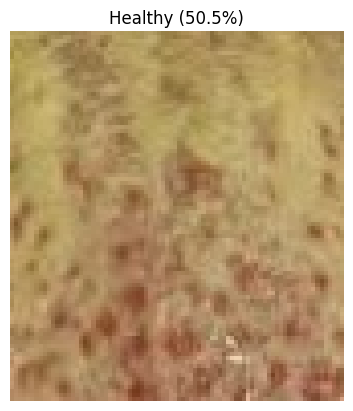


Prediction: Healthy
Confidence: 50.51%


('Healthy', np.float32(50.514404))

In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, img_size=224):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((img_size, img_size))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_user_image(model, image_path, class_names):
    img_array = preprocess_image(image_path)
    preds = model.predict(img_array)
    idx = np.argmax(preds[0])
    conf = preds[0][idx] * 100
    label = class_names[idx]
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{label} ({conf:.1f}%)")
    plt.show()
    print(f"\nPrediction: {label}\nConfidence: {conf:.2f}%")
    return label, conf

# Run the prediction
predict_user_image(model, image_path, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


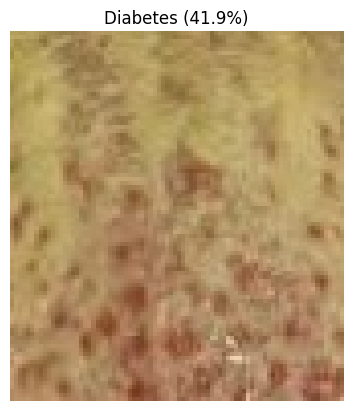


Prediction: Diabetes
Confidence: 41.92%


('Diabetes', np.float32(41.91969))

In [38]:
def predict_and_filter_healthy(model, image_path, class_names, img_size=224, healthy_idx=0, threshold=80.0):
    """
    Predicts the class of the uploaded tongue image.
    - Only reports 'Healthy' if its confidence is above the threshold.
    - Otherwise, reports the highest disease class (ignoring 'Healthy').

    Args:
        model: tf.keras Model
        image_path: str, filename of uploaded image
        class_names: list of str, in correct order
        img_size: int
        healthy_idx: int, index of 'Healthy' class in class_names
        threshold: float, confidence (%) needed to report Healthy

    Returns:
        label (str), confidence (float)
    """
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt

    # Preprocess the image
    img = Image.open(image_path).convert('RGB')
    img = img.resize((img_size, img_size))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    preds = model.predict(img_array)
    probs = preds[0]
    healthy_conf = probs[healthy_idx] * 100

    if healthy_conf >= threshold:
        label = class_names[healthy_idx]
        conf = healthy_conf
    else:
        # Mask out 'Healthy' and pick highest disease class
        disease_probs = np.copy(probs)
        disease_probs[healthy_idx] = -1  # Exclude 'Healthy'
        idx = np.argmax(disease_probs)
        label = class_names[idx]
        conf = probs[idx] * 100

    # Display image and result
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{label} ({conf:.1f}%)")
    plt.show()
    print(f"\nPrediction: {label}\nConfidence: {conf:.2f}%")
    return label, conf

# Usage:
# class_names = ['Healthy', 'Diabetes', 'Gastritis', 'Anemia', 'Other Conditions']
predict_and_filter_healthy(model, image_path, class_names)


In [39]:
# Save the updated Keras model
model.save('heal_nova_tongue_mobilenetv3_updated.h5')
print("✅ Updated model saved as 'heal_nova_tongue_mobilenetv3_updated.h5'")


✅ Updated model saved as 'heal_nova_tongue_mobilenetv3_updated.h5'
